In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")
sys.path.append("../src")

In [4]:
from sklearn.utils.estimator_checks import check_estimator
from src.models.ordinal import OrdinalClassifier

check_estimator(OrdinalClassifier())

RuntimeError: scikit-learn estimators should always specify their parameters in the signature of their __init__ (no varargs). <class 'src.models.ordinal.OrdinalClassifier'> with constructor (self, clf=None, *args, **kwargs) doesn't  follow this convention.

In [3]:
import glob

filelist = glob.glob("/Volumes/WD-MKAIROV/for_Soroosh/Normalized_brains/*/wT1_acpc_*.nii")
filelist = sorted([f.replace("__", "_") for f in filelist], key=lambda f: int(f.split("_")[-1].split(".")[0]))

In [4]:
import gc
import numpy as np
import nibabel as nib

for f in filelist:
    f_name = f.split("/")[-1]
    data = np.nan_to_num(np.array(nib.load(f).dataobj))
    nimg = nib.Nifti1Image(data, affine=np.eye(4))
    nib.save(nimg, f"strip/{f_name}")
    !bet strip/{f_name} strip/{f_name} -R
    !rm strip/{f_name}
    !gzip -d strip/{f_name}.gz
    gc.collect()

Image Exception : #61 :: Multiple possible filenames detected for basename: strip/wT1_acpc_2
Image Exception : #22 :: Failed to read volume strip/wT1_acpc_2
Error : Multiple possible filenames detected for basename: strip/wT1_acpc_2
Failed to read volume strip/wT1_acpc_2
Error : Multiple possible filenames detected for basename: strip/wT1_acpc_2
Image Exception : #61 :: Multiple possible filenames detected for basename: strip/wT1_acpc_3
Image Exception : #22 :: Failed to read volume strip/wT1_acpc_3
Error : Multiple possible filenames detected for basename: strip/wT1_acpc_3
Failed to read volume strip/wT1_acpc_3
Error : Multiple possible filenames detected for basename: strip/wT1_acpc_3
Image Exception : #61 :: Multiple possible filenames detected for basename: strip/wT1_acpc_4
Image Exception : #22 :: Failed to read volume strip/wT1_acpc_4
Error : Multiple possible filenames detected for basename: strip/wT1_acpc_4
Failed to read volume strip/wT1_acpc_4
Error : Multiple possible filena

In [6]:
def get_file_np(index):
    return np.nan_to_num(np.array(nib.load(filelist[index]).dataobj))

In [8]:
test_data = np.empty((100, 182, 218, 182))

for i in range(100):
    test_data[i, ...] = get_file_np(i)

In [24]:
test_data[:, 91:, :, :].mean()

0.02539130403055843

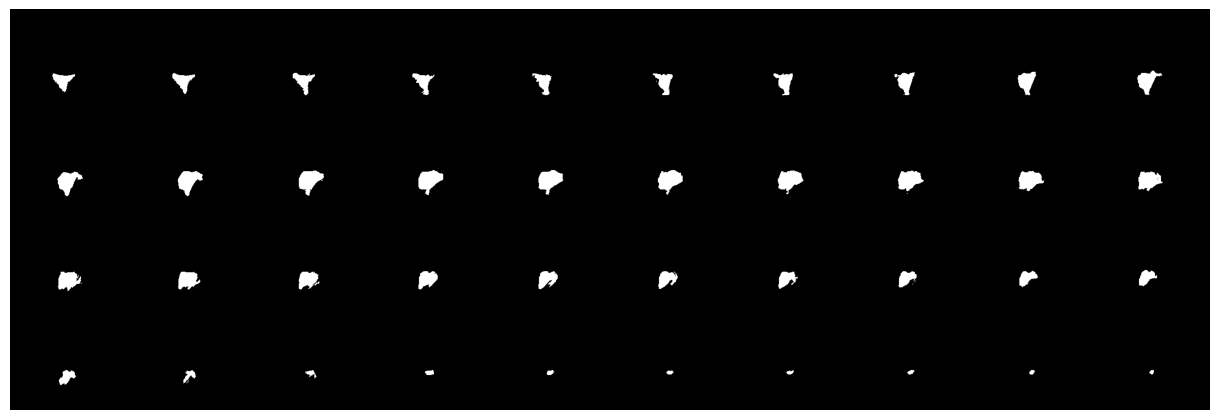

In [19]:
import matplotlib.pyplot as plt

def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


# Visualize montage of slices.
# 4 rows and 10 columns for 100 slices of the CT scan.
plot_slices(4, 10, 182, 218, test_data[0, :, :, 80:120])

In [14]:
test_data.shape

(100, 182, 218, 182)